In [40]:
from IPython.display import Image
from IPython.core.display import HTML 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [152]:
%run scraper1.py
a1 = pd.read_csv("bookLooks1.csv")

There are about 620 books listed on BookLooks as of 07/28/2023.
There were about 613 files as of 07/17/2023.
The following books have been added since the last scrape:
    Letters to Live By: An Alphabet Book with Intention By Lisa Frenkel Riddiough
    Let Me Play By Karen Blumenthal
    A Game of Thrones: the graphic novel volume 2 By George R. R. Martin adapted by Daniel Abraham
    A Game of Thrones By George R. R. Martin
    Fifty Shades of Grey By E.I. James
    A Day In the Life of Marlon Bundo By Marlon Bundo with Jill Twiss
    An American Story By Kwame Alexander
There have been 69 books added since 05/06/2023


## BookLooks is a website used by far-right conservative groups like Moms For Liberty. It's a rating system not unlike the one used by the Motion Picture Association of America. The website was created in March 2022, according to records found at domain.glass. 
## The rating system is a numerical scale from 0 to 5, with 5 being similar to an X rating by the MPAA and a 0 akin to the MPAA's G rating.

In [72]:
# Show the image
image_url = "http://booklooks.org/data/files/currentcontentbasedratingsystemincludingdefinitionsimprovedpngedit.png"
display(Image(url=image_url, width=1200))

## As we can see by the chart below, more books received BookLooks 2 rating more than any other, but the vast majority fall somewhere between a 1 and a 4. It appears there are nearly twice as many books rated a 0 as rated a 5. 

<AxesSubplot:>

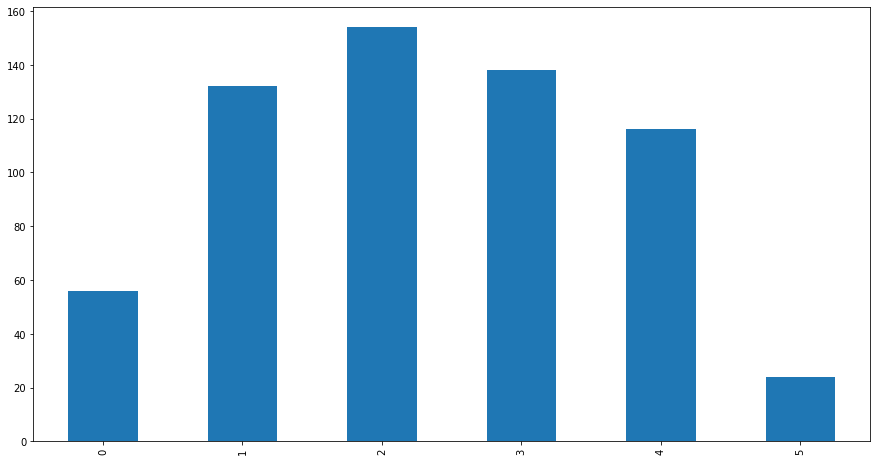

In [74]:
a1.rating.value_counts().sort_index().plot(kind='bar', figsize=(15, 8))

## This is an example of what the database we're using looks like using a random sampling of five titles. Some books have a general summary but it appears that all books have a summary of concerns section. 

In [81]:
a1.sample(5)

,title,author,rating,retrieved_date,Book_Summary,Summary_of_Concerns,Mitigating_Factor,Reading_Level,ISBN,book_report_pages
149,CLOSER,Dennis Cooper,5,05/06/2023,Troubled homosexual teen boys share\nsexual ex...,This book contains aberrant sexual activities;...,NaN,Adult,9780802132123,10
233,THE GIFT,Danielle Steel,4,05/06/2023,A young teenage girl becomes pregnant\nand gai...,This book contains alcohol use by minors; sexu...,NaN,Adult,0-385-31292-X,6
604,CLUB DRUGS,Hal Marcovitz,2,07/04/2023,NaN,This book contains drug abuse and inexplicit s...,NaN,Juvenile,9781590185179,2
188,DREAM STREET,Tricia Elam Walker and Ekua Holmes,0,05/06/2023,NaN,There are no concerns with this book.,NaN,Easy Reader,978-0-525-58110-9,1
396,MORE HAPPY THAN NOT,Adam Silvera,3,05/06/2023,A teenage boy recalls his memories after\natte...,This book contains alternate sexualities; sexu...,NaN,Young Adult,978-1-64129-276-4,10


## Below is a graphic showing the most frequently used phrases for the summary of concerns by their rating. 

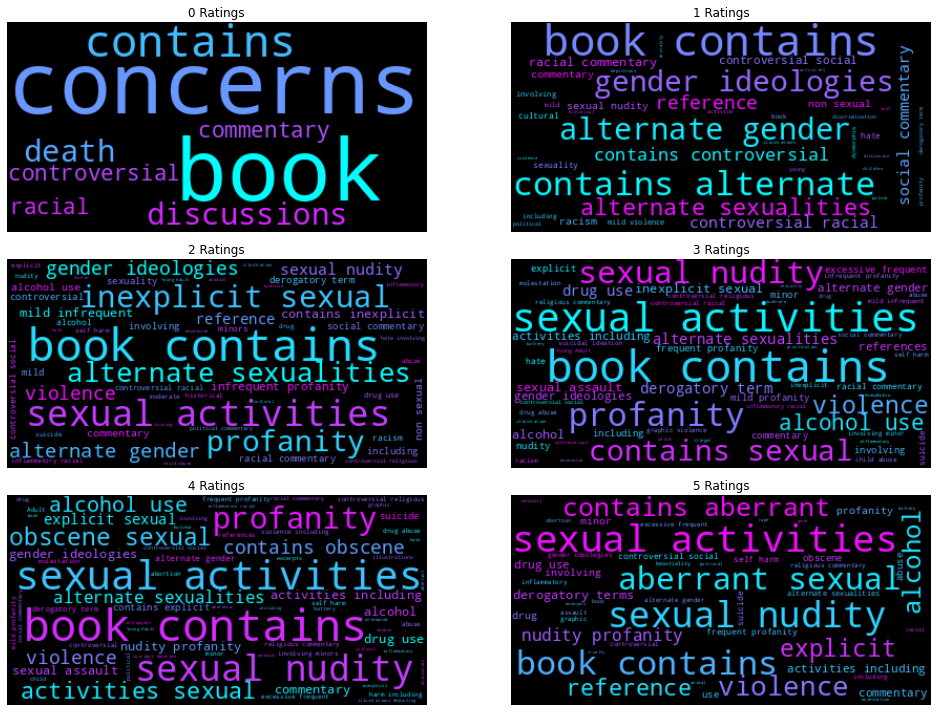

In [122]:
%run WordCloud_forNational.py

## Obviously sex and gender play a pretty big role across all ratings. 
## Below, I'm dividing the database into two other dataframes. One is for books with sexuality and gender ideologies in its summary of concerns. The other is everything else. 

In [138]:
word_list = ['sexualities','sexuality','gender', 'ideologies']
pattern = "|".join(word_list)
gender_sex=a1[a1.Summary_of_Concerns.str.contains(pattern, case=False, na=False)]
other=a1[~a1.Summary_of_Concerns.str.contains(pattern, case=False, na=False)]

<AxesSubplot:>

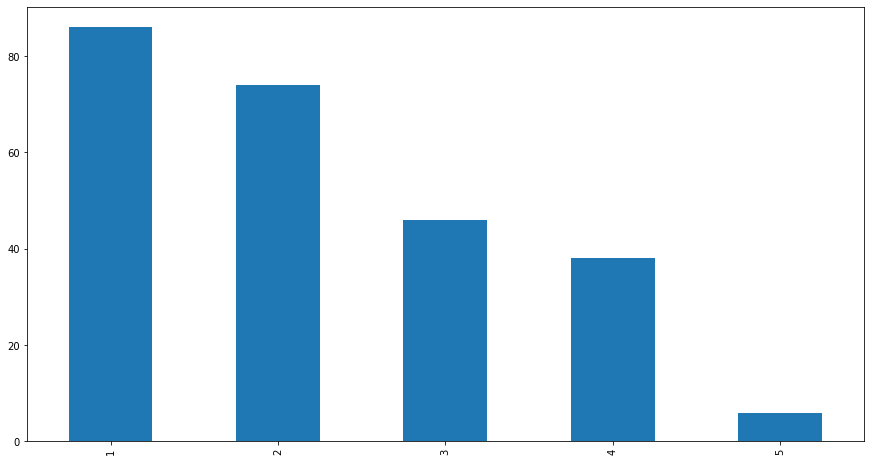

In [139]:
gender_sex.rating.value_counts().sort_index().plot(kind='bar',figsize=(15,8))

## As we can see, these concerns are more common in the lower rated books. This doesn't really match up with our more even distribution of overall ratings. Remember, a 2 rating was the most common, followed by a 3 and then a 1. I'm having trouble expressing why this is important. Let's call it a Columbo - a little thing that seems important but for unclear reasons.

<AxesSubplot:>

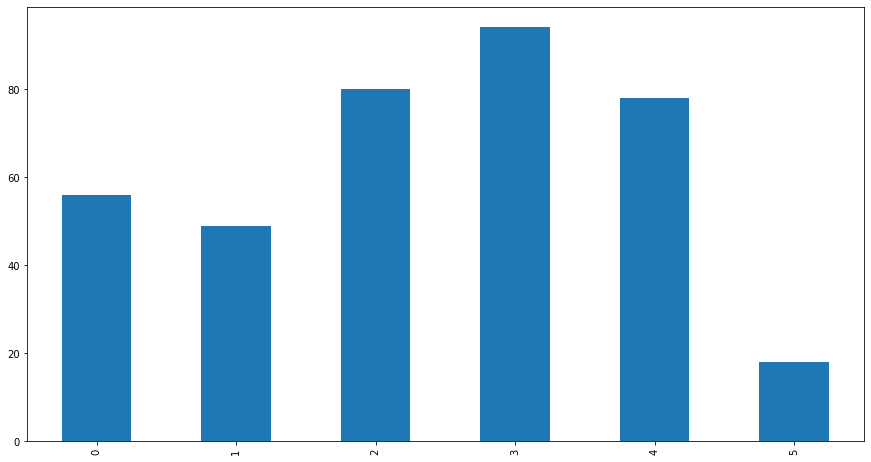

In [136]:
other.rating.value_counts().sort_index().plot(kind='bar',figsize=(15,8))

## Maybe it's because the distrubtuion for everything else is a bit more evenly split. For now, let's move on to reading level.

<AxesSubplot:>

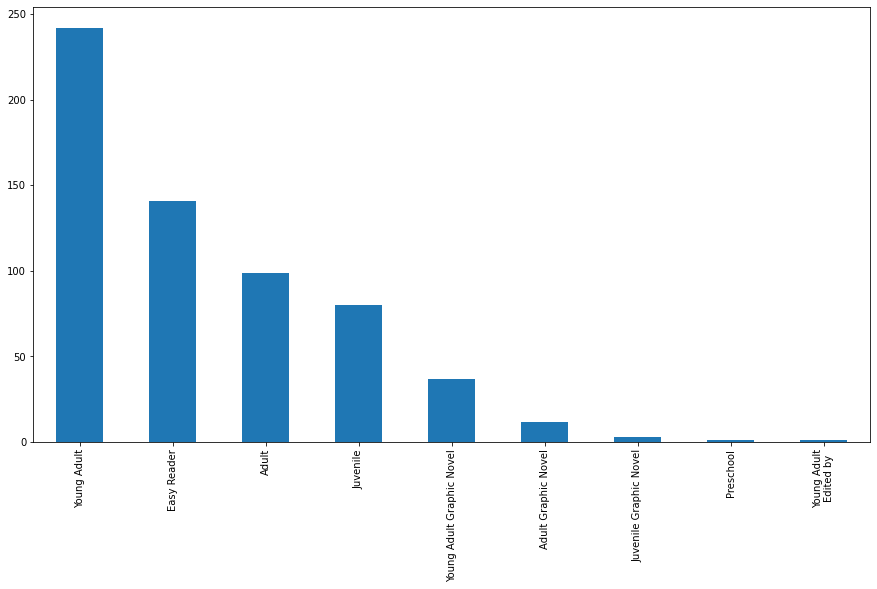

In [143]:
a1.Reading_Level.value_counts().plot(kind="bar",figsize=(15,8))

## The bar chart above shows us that "Young Adult" books are by far the most common reading level; however, that level is assigned by BookLooks and not another source. The "Easy Reader" level appear to be mostly picture books or books for children five and under. The "Adult" level is kind of odd here. The only place I've really seen "Adult" used in the context of books is for erotica. For BookLooks, I think it just means any book that someone reading at a 12th grade level could understand. 

In [153]:
a1[a1.title.str.contains("HANDM")]

,title,author,rating,retrieved_date,Book_Summary,Summary_of_Concerns,Mitigating_Factor,Reading_Level,ISBN,book_report_pages
252,THE HANDMAID'S TALE,Margaret Atwood,4,05/06/2023,"In the near future, America becomes a\npuritan...",This book contains profanity; violence; sexual...,NaN,Adult,978-0-547-34566-6,6
253,THE HANDMAID'S TALE THE GRAPHIC NOVEL,Margaret Atwood adapted by Renee Nault,4,05/06/2023,Young women are used by the totalitarian\nStat...,This book contains alcohol use; explicit sexua...,NaN,Young Adult Graphic Novel,9780385544856,13


## Here's a good example of what I mean. The traditional novel version of Atwood's "The Handmaid's Tale" is considered an Adult book but the graphic novel version is Young Adult. After all, both version get a 4 rating, which would be like an NC-17 rating for a movie. 

In [161]:
a1[a1.title.str.contains("MAUS")]

,title,author,rating,retrieved_date,Book_Summary,Summary_of_Concerns,Mitigating_Factor,Reading_Level,ISBN,book_report_pages
375,MAUS 1: A SURVIVOR'S TALE: MY FATHER BLEEDS HI...,Art Spiegelman,2,05/06/2023,"A father begins telling his son, his story of\...",This book contains graphic violence; hate invo...,Positive narrative regarding the harms of extr...,Adult Graphic Novel,978-0-394-74723-1,2
376,MAUS 2: A SURVIVOR'S TALE: AND HERE MY TROUBLE...,Art Spiegelman,2,05/06/2023,"A father tells his son, his story of survival\...",This book contains hate involving antisemitism...,Positive narrative portraying the harms of ext...,Adult Graphic Novel,978-0-679-72977-8,3


## It makes even less sense considering that both volumes of Spiegelman's Maus are considered an Adult Graphic Novel but are rated a 2. Maus has mitigating factors like portraying the harms of extremism and "The Hitler's Holocaust" (yes, that's how they said it).

## But, what we really want to know is if this is having an impact elsewhere. The short answer is yes. We have a file of Central Bucks School District, PA, book challenges and I've got some that simply link directly to BookLooks. Others include verbatim descriptions taken from the website. 
## In Brevard County, FL, across the state from Brevard County, birthplace of Moms for Liberty, there are some interesting comparisons. 

In [184]:
#This is a downloaded version of the district's book challenges posted here: https://docs.google.com/spreadsheets/d/1hv6Wtu55zY3t5bmbksY2ie7Q-L3zAQdjrtaFh4duLC4/edit#gid=0
escambia = pd.read_csv("ECPS 22-23 Reconsiderations (website) - Sheet1.csv")
#A little column name cleaning
escambia.columns=escambia.columns.str.lower().str.replace(" ","_")
escambia['title']=escambia.title.str.upper()
#convert date column to datetime 
escambia['date_challenge_submitted']=pd.to_datetime(escambia.date_challenge_submitted,errors='coerce')
#Print out total number of titles challenged in Escambia County
escambia.title.count()
#escambia[escambia.title.isin(a1.title)].title.count()

222

In [180]:
#Titles that are an exact match for the titles in our BookLooks database
escambia[escambia.title.isin(a1.title)].title.count()

119

## While there are 119 books challenged in Escambia County that also appear in our BookLooks data, that's not a complete count. After reviewing the more than 100 books that didn't match, I found about 35 other titles that were missing words like "the" from the title. That's about 154 out of 222 titles. What's more, looking through a few challenge forms, it appears that some of these complaintants are using the BookLooks reports to copy and paste excerpts into their challenge forms. 

In [192]:
min(escambia.date_challenge_submitted.dt.date)

datetime.date(2022, 6, 2)

In [193]:
max(escambia.date_challenge_submitted.dt.date)

datetime.date(2023, 7, 27)

## The earliest challenge in Escambia came just a few months after BookLooks was created. The most recent was a day before I made this notebook.

In [197]:
somerset=pd.read_csv("Book Reconsideration Status - Sheet1Wisconsin.csv")
somerset.columns=somerset.columns.str.lower().str.replace(" ",'_')
somerset=somerset[somerset.book_title.notna()]

In [199]:
somerset.book_title.count()

28

In [176]:
somerset[somerset.book_title.str.upper().isin(a1.title)].book_title.count()

22

## In Somerset, WI, there were 28 challenged books and 22 of them are also on BookLooks.

In [200]:
somerset

,book_title,author,reconsideration_submission_&_date,anticipated_decision_timeframe,professional_reviews,date_of_committee_decision,committee_decision,appealed_(y/n),school_board_decision
0,The Perks of Being a Wallflower,Stephen Chbosky,Petitioner Letter & Documents 2/17/2023,"April, 2023",Reviews & Awards,4/14/2023. Decision Letter,Remain in the Library,Y Appeal Letter,Remain in the Library (4-3 vote)
2,Last Night at the Telegraph Club,Malinda Lo,Petitioner Letter & Documents 2/17/2023,"August, 2023",NaN,NaN,NaN,NaN,NaN
3,Sold,Patricia McCormick,Petitioner Letter & Documents 2/17/2023,"August, 2023",NaN,NaN,NaN,NaN,NaN
4,The Kite Runner,Khaled Hosseini,Petitioner Letter & Documents 2/17/2023,"August, 2023",NaN,NaN,NaN,NaN,NaN
6,Slaughterhouse Five,Kurt Vonnegut,Petitioner Letter & Documents 2/17/2023,"December, 2023",NaN,NaN,NaN,NaN,NaN
7,Water for Elephants,Sarah Gruen,Petitioner Letter & Documents 2/17/2023,"December, 2023",NaN,NaN,NaN,NaN,NaN
8,Nineteen Minutes,Jodi Picoult,Petitioner Letter & Documents 2/17/2023,"December, 2023",NaN,NaN,NaN,NaN,NaN
10,Tricks,Ellen Hopkins,Petitioner Letter & Documents 2/17/2023,"April, 2024",NaN,NaN,NaN,NaN,NaN
11,Identical,Ellen Hopkins,Petitioner Letter & Documents 2/17/2023,"April, 2024",NaN,NaN,NaN,NaN,NaN
12,Blankets,Craig Thompson,Petitioner Letter & Documents 2/17/2023,"April, 2024",NaN,NaN,NaN,NaN,NaN


## Also, the reconsideration submission dates for all 28 books are the same. Fortunately, Somerset's challenges contain links to the petition letter.  

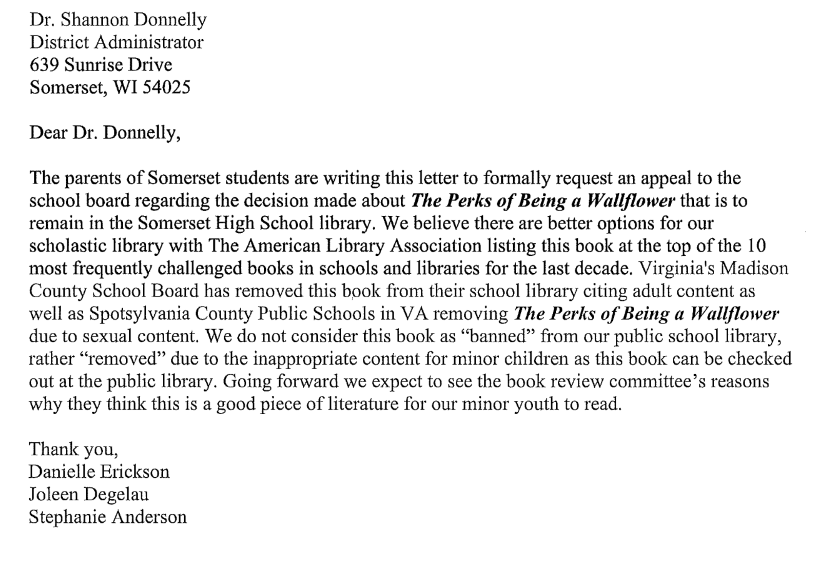

In [207]:
display(Image(filename="C://Users//c_ull//OneDrive//Pictures/StCroixPerks Appeal letter.png", width=1200))

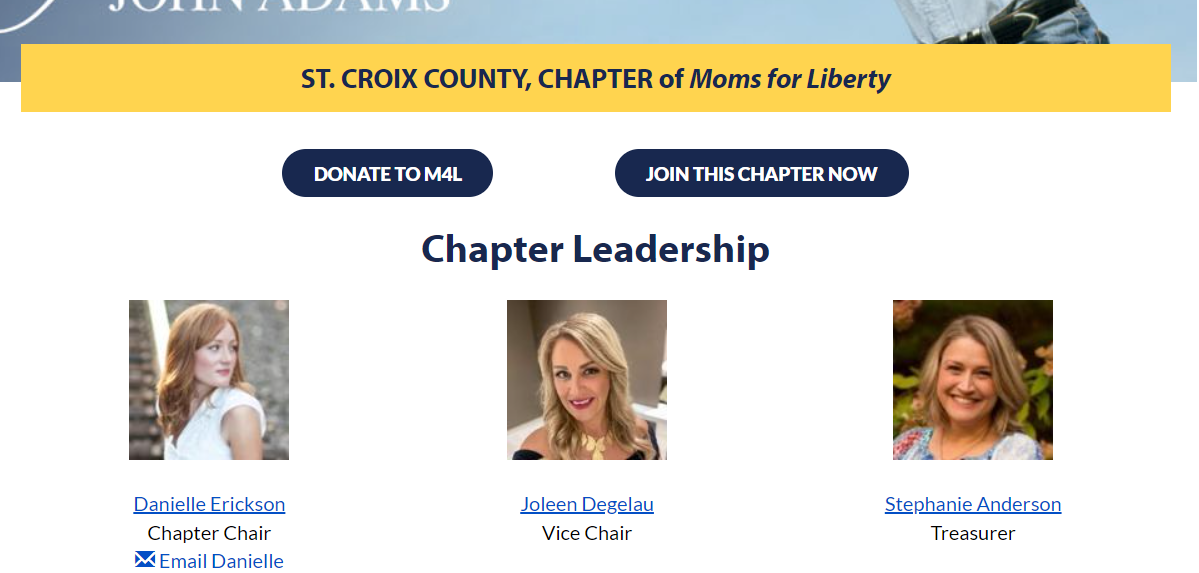

In [208]:
display(Image(filename="C://Users//c_ull//OneDrive//Pictures/M4L StCroixCounty.png", width=1200))

## These M4L members names are on the intial challenges for most, if not all of the books in St. Croix County's Somerset School District. 

## Escambia County doesn't have a M4L chapter, yet. All of the challenges in that district do appear to be coming from someone named Vicki Blaggett, a high school English teacher in the county. She's also a member of a group called LaVerna In the Library, based in Utah. LaVerna is one of the many groups that rallied around banning books before BookLooks existed. Think of it is as a precursor.